# EDA Project: Flights Dataset  
**Author:** Blessing Aganaga  
**Date:** June 2025  
**Purpose:**  
To perform an exploratory data analysis on the `flights` dataset provided by Seaborn.  
This project explores monthly airline passenger trends over time, identifies seasonal patterns, and visualizes long-term growth in air travel.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set_theme(style="whitegrid")


## Data Acquisition  
For this project, we use the classic Flights dataset, which records the monthly number of international airline passengers from 1949 to 1960.

The dataset includes the following columns:
- `year`: The year of the observation.
- `month`: The month of the observation.
- `passengers`: The number of passengers recorded that month.



In [9]:
# Load the flight data CSV file from the data folder
df = pd.read_csv('data/flight_data.csv')

# Display the first few rows to verify
df.head()


,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


##  Initial Data Inspection  
We’ll check the first few rows, the dataset shape, and column data types.


In [10]:
print(df.head(10))
print(df.shape)
print(df.dtypes)


   year      month  passengers
0  1949    January         112
1  1949   February         118
2  1949      March         132
3  1949      April         129
4  1949        May         121
5  1949       June         135
6  1949       July         148
7  1949     August         148
8  1949  September         136
9  1949    October         119
(144, 3)
year           int64
month         object
passengers     int64
dtype: object


## Descriptive Statistics  
Use `.describe()` to get summary statistics for the numeric column.


In [11]:
print(df.describe())



              year  passengers
count   144.000000  144.000000
mean   1954.500000  280.298611
std       3.464102  119.966317
min    1949.000000  104.000000
25%    1951.750000  180.000000
50%    1954.500000  265.500000
75%    1957.250000  360.500000
max    1960.000000  622.000000


## Distribution of Passenger Counts  
We plot a histogram to observe the distribution of the `passengers` column.


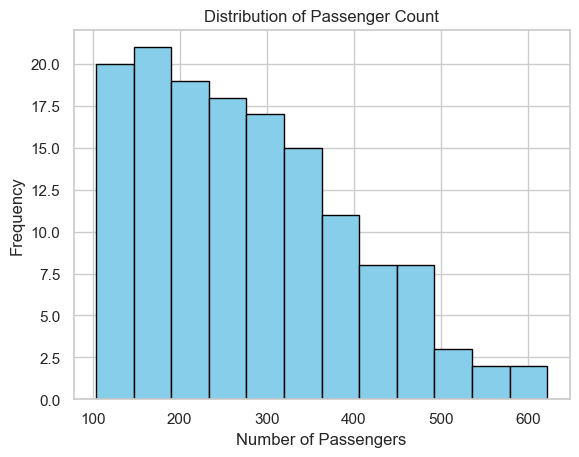

In [12]:
df['passengers'].hist(bins=12, color='skyblue', edgecolor='black')
plt.title("Distribution of Passenger Count")
plt.xlabel("Number of Passengers")
plt.ylabel("Frequency")
plt.show()


##  Distribution of Categorical Features  
We’ll display and visualize how the months are distributed in the dataset.


month
January      12
February     12
March        12
April        12
May          12
June         12
July         12
August       12
September    12
October      12
November     12
December     12
Name: count, dtype: int64


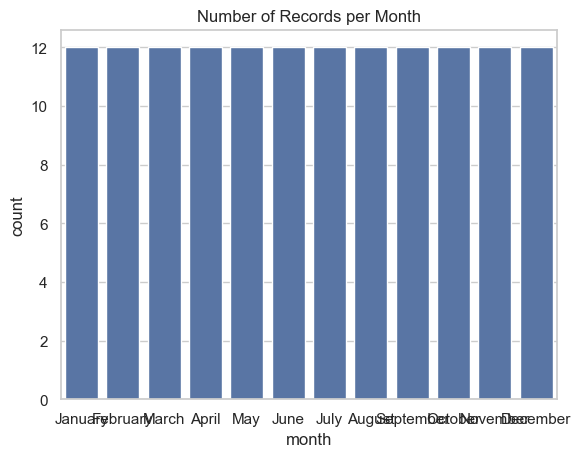

In [13]:
print(df['month'].value_counts())

sns.countplot(x='month', data=df, order=df['month'].unique())
plt.title("Number of Records per Month")
plt.show()


##  Data Transformation  
We rename the `passengers` column and create a new column using log transformation for better scaling.


In [14]:
df.rename(columns={'passengers': 'num_passengers'}, inplace=True)
df['log_passengers'] = df['num_passengers'].apply(lambda x: round(np.log(x), 2))
df.head()


,year,month,num_passengers,log_passengers
0,1949,January,112,4.72
1,1949,February,118,4.77
2,1949,March,132,4.88
3,1949,April,129,4.86
4,1949,May,121,4.80


## Trend: Total Passengers Per Year  
Let’s examine the overall trend in air travel over time.


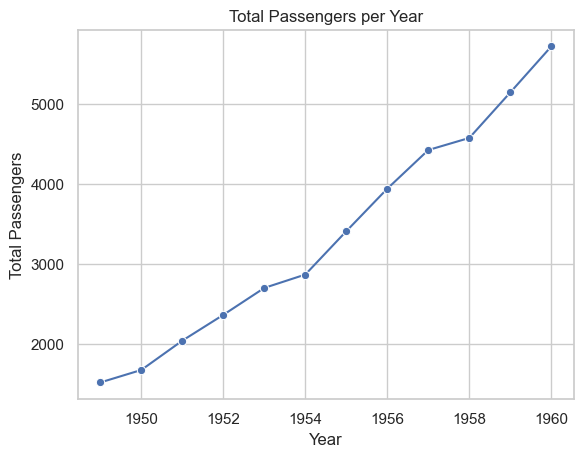

In [15]:
df_year = df.groupby('year')['num_passengers'].sum().reset_index()

sns.lineplot(data=df_year, x='year', y='num_passengers', marker='o')
plt.title("Total Passengers per Year")
plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.show()




**Insight:**  
Passenger traffic increased steadily between 1949 and 1960, reflecting strong growth in air travel.


## Monthly Heatmap  
Use a heatmap to visualize passenger volume across months and years.


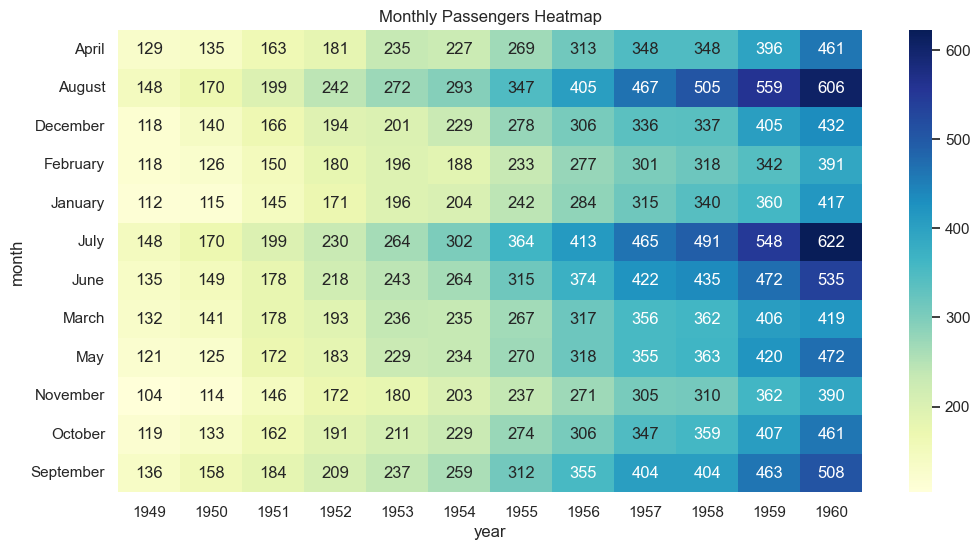

In [16]:
pivot = df.pivot(index="month", columns="year", values="num_passengers")

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Monthly Passengers Heatmap")
plt.show()


**Insight:**  
Travel peaks in July and August each year. January and February tend to have the lowest numbers.


##  Monthly Trends by Year  
Overlay lines to compare month-to-month variation across all years.


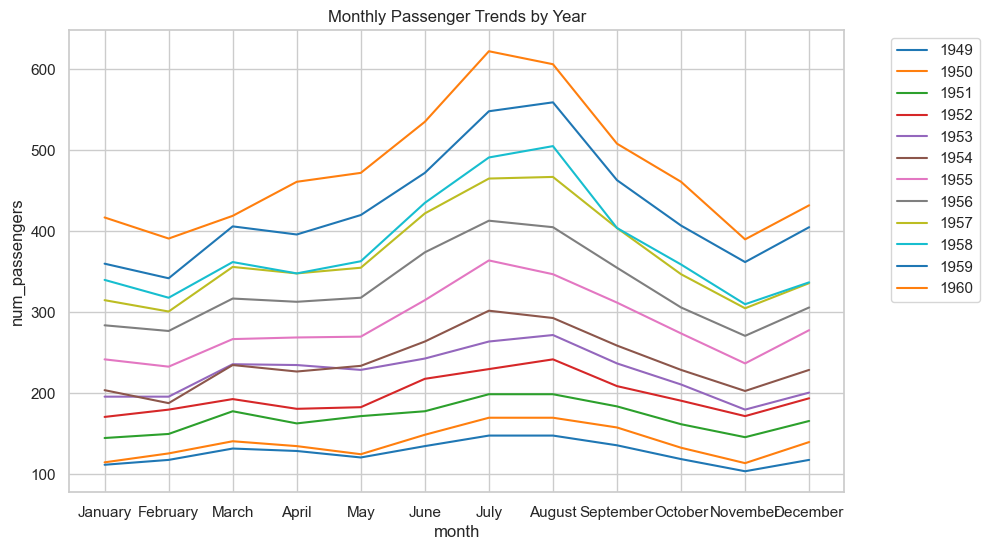

In [17]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="month", y="num_passengers", hue="year", palette="tab10")
plt.title("Monthly Passenger Trends by Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


**Insight:**  
Each year shows a consistent pattern: traffic rises from spring through summer, dips in fall and winter, suggesting clear seasonality in air travel.


###  Story

The line plot of monthly airline passengers from 1949 to 1960 shows a clear upward trend in air travel.  
Each year, passenger numbers peak around July and August, reflecting strong seasonality in travel behavior — likely due to summer vacations and holidays.  

Over time, we also observe a consistent year-over-year increase in passenger volume, suggesting growing airline accessibility, economic expansion, and increased public interest in air travel.  

These patterns tell a story of not just growth, but predictable cycles — crucial for airlines planning schedules, pricing strategies, and fleet operations.


## Summary & Conclusion  
- Air travel grew steadily from 1949 to 1960.  
- July and August consistently had the highest passenger numbers.  
- There’s strong seasonality, with lower numbers in early and late months.  
- The log transformation provided a better view of skewed data.



##  References  
- Seaborn Flights Dataset: https://github.com/mwaskom/seaborn-data/blob/master/flights.csv  
- Seaborn Documentation: https://seaborn.pydata.org/  
- pandas Documentation: https://pandas.pydata.org/docs/  
- Matplotlib Documentation: https://matplotlib.org/stable/index.html  
